# description: 

In [2]:
# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import hdf5storage as hdf5s
import h5py


In [227]:

# Experiment info 
# loading the imagined data

# initilize the values
class structtype():
    pass

ExptDays = list(['20201002','20201009','20201016','20201030','20201113','20201117','20201118','20201125','20201211'])
NumDay = len(ExptDays);
SessionDay = [ structtype() for i in range(NumDay)]
SessionDay[0].hhmmss = list(['145058','145910','150443','151528','152108'])
SessionDay[1].hhmmss = list(['134342','134836','135450','135947'])
SessionDay[2].hhmmss = list(['142924','144138','144924'])
SessionDay[3].hhmmss = list(['133902','134541','134838','141625','142426'])
SessionDay[4].hhmmss = list(['134350','135330','135938','140554'])
SessionDay[5].hhmmss = list(['111747','112508','113040','141009'])
SessionDay[6].hhmmss = list(['140255','140540'])
SessionDay[7].hhmmss = list(['105228','111217','112507','112711','113526','114108','143218','143824'])
SessionDay[8].hhmmss = list(['114458','114725'])

# for reading mat file from matlab
# it is easier to use class for further extracting necessary params or data
class MatFileAnalyzer():
    
    # first mandatory method; constructor
    def __init__(self,Mat_data):
        self.Fs = Mat_data['TrialData']['Params']['Fs'][0][0]
        self.UpdateRate = Mat_data['TrialData']['Params']['UpdateRate'][0][0]
        self.TargetID = Mat_data['TrialData']['TargetID'][0][0]
        self.SelectedTargetID = Mat_data['TrialData']['SelectedTargetID'][0][0]
        self.MaxReachTime = Mat_data['TrialData']['Params']['MaxReachTime'][0][0]
        self.Click_BinNum = Mat_data['TrialData']['Params']['ClickCounter'][0][0]
        
    def ECoG_Raw(self):

        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData = np.empty((0,128), dtype=float)
        for i in range(BinNum):
            Bin = Mat_data['TrialData']['BroadbandData'][i][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData = np.concatenate((ECoGData, BinData.T), axis=0)

        return ECoGData
    
    
    def ECoG_Raw_Trial(self):
        
        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData_Trial = np.empty((0,128), dtype=float)
        
        if ExptDays[Day] == '20201002':
        
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['BroadbandData'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)

            return ECoGData_Trial
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['BroadbandData'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)
                
            return ECoGData_Trial
        
    
    def Features_All(self):
        
        Features = Mat_data['TrialData']['NeuralFeatures']
        BinNum = Features.shape[0]
        NeuralFeatures = np.empty((0,896), dtype=float)
        
        if ExptDays[Day] == '20201002':
            
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['NeuralFeatures'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['NeuralFeatures'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
    def SmoothedFeatures_All(self):
        
        Features = Mat_data['TrialData']['SmoothedNeuralFeatures']
        BinNum = Features.shape[0]
        SmoothedNeuralFeatures = np.empty((0,896), dtype=float)
                  
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:
            if ExptDays[Day] == '20201009':
                j=j-1

            Bin = Mat_data['TrialData']['SmoothedNeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            SmoothedNeuralFeatures = np.concatenate((SmoothedNeuralFeatures, BinData), axis=0)

        return SmoothedNeuralFeatures   


Trials_T1 = np.empty((0,896), dtype=float)
Trials_T2 = np.empty((0,896), dtype=float)
Trials_T3 = np.empty((0,896), dtype=float)
Trials_T4 = np.empty((0,896), dtype=float)

Trials_Raw_T1 = np.empty((0,128), dtype=float)
Trials_Raw_T2 = np.empty((0,128), dtype=float)
Trials_Raw_T3 = np.empty((0,128), dtype=float)
Trials_Raw_T4 = np.empty((0,128), dtype=float)


# numnber of censequative bins for making correct selections
Click_BinNum_T1 = []
Click_BinNum_T2 = []
Click_BinNum_T3 = []
Click_BinNum_T4 = []

Day_NumTrial_T1 = []
Day_NumTrial_T2 = []
Day_NumTrial_T3 = []
Day_NumTrial_T4 = []


# loading the day/block/session data from the location
# day 0 does not have SmoothedNeuralFeatures
# day 6 the performance was not good
for Day in [ 1, 2, 3, 4, 5, 6, 7, 8]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        if ExptDays[Day] in ['20201002','20201009']:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'RadialTask',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        else:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'DiscreteArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if ExptDays[Day] == '20201002' and ((LenSignal/Fs) < (MaxReachTime)):
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()

                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, NeuralFeatures, axis=0)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2,NeuralFeatures, axis=0)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, NeuralFeatures, axis=0)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, NeuralFeatures, axis=0)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 

            elif ExptDays[Day] != '20201002' and TrialData.SelectedTargetID == TrialData.TargetID:
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1.append(TrialData.Click_BinNum)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2.append(TrialData.Click_BinNum)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3.append(TrialData.Click_BinNum)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4.append(TrialData.Click_BinNum)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 
                    
    Day_NumTrial_T1.append(ID1)
    Day_NumTrial_T2.append(ID2)
    Day_NumTrial_T3.append(ID3)
    Day_NumTrial_T4.append(ID4)
    

print('End of Running Section')  

                      

Session:134342
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6


/home/reza/anaconda3/envs/ECoGControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:194: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 7
Trial: 8
Session:134836
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:135450
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:135947
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:142924
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Tria

Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Session:114458
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Session:114725
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
End of Running Section


In [232]:
Trials_T4.shape

(995, 896)

In [233]:
Day_NumTrial_T4

[28, 21, 32, 28, 35, 10, 51, 9]

In [236]:
 Trials_Raw_T3.shape

(136655, 128)

In [11]:
type(Trials_Raw_T4)

numpy.ndarray

# extracting the HG-LFO for each data point in each trial as feature for later analysis

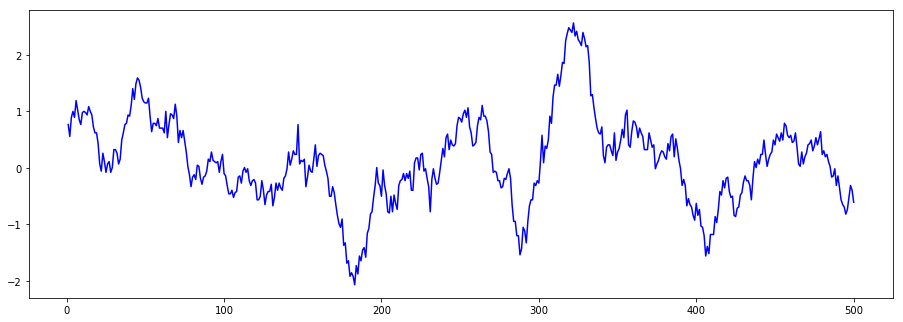

In [237]:
# plot an example of broadband ECoG
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Trials_Raw_T4[0:500,0],'b')


# Filtering the signal

In [238]:
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt

All_Signal = [Trials_Raw_T1, Trials_Raw_T2, Trials_Raw_T3, Trials_Raw_T4];

# initilize the values
class structtype():
    pass

HilbertTarget = [ structtype() for i in range(4)]
HilbertTarget[0].feature = [ structtype() for i in range(6)]
HilbertTarget[1].feature = [ structtype() for i in range(6)]
HilbertTarget[2].feature = [ structtype() for i in range(6)]
HilbertTarget[3].feature = [ structtype() for i in range(6)]

for target in range(4):
    print('Target:',target)
    Raw_Signals = All_Signal[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget[target].feature[5] = Hil2
    
print('End of Running Section')  


Target: 0
Target: 1
Target: 2
Target: 3
End of Running Section


(149412, 128)

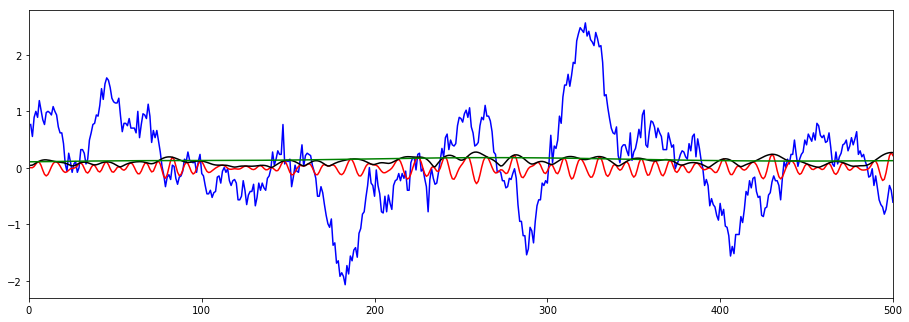

In [239]:
# test the process of filtering signal for hg-lfo
#a, b = Raw_Signals.shape
#t = np.arange(1,a+1,1)
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Raw_Signals[0:500,0],'b')
ax.plot(t,Filtered[0:500,0],'r')
ax.plot(t,Hil1[0:500,0],'k')
Forplot = HilbertTarget[3].feature[5]
ax.plot(t,Forplot[0:500,0],'g')
ax.set_xlim([0,500])
#ax.set_ylim([0,2])
Raw_Signals.shape

# decide the inputs to RNN/LSTM

In [240]:
# choosing the broadband ECoG for trials
'''
Data_T1 = Trials_Raw_T1
Data_T2 = Trials_Raw_T2
Data_T3 = Trials_Raw_T3
Data_T4 = Trials_Raw_T4
'''

# or choose the feature hg-lfo

Data_T1 = HilbertTarget[0].feature[5]
Data_T2 = HilbertTarget[1].feature[5]
Data_T3 = HilbertTarget[2].feature[5]
Data_T4 = HilbertTarget[3].feature[5]


# choose other features.....






# Bring the data to torch space / peform LSTM

In [8]:
import torch
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
# generate the train_data for LSTM
# use neural feature as input or the broad band

Data_T1_torch = torch.from_numpy(Data_T1)
Data_T2_torch = torch.from_numpy(Data_T2)
Data_T3_torch = torch.from_numpy(Data_T3)
Data_T4_torch = torch.from_numpy(Data_T4)

In [242]:
Data_T1_torch

tensor([[0.1326, 0.1283, 0.2148,  ..., 0.1453, 0.1472, 0.1570],
        [0.1338, 0.1303, 0.2173,  ..., 0.1471, 0.1490, 0.1584],
        [0.1351, 0.1322, 0.2199,  ..., 0.1490, 0.1508, 0.1598],
        ...,
        [0.1307, 0.1480, 0.2018,  ..., 0.1516, 0.1448, 0.1561],
        [0.1307, 0.1480, 0.2018,  ..., 0.1516, 0.1448, 0.1561],
        [0.1307, 0.1480, 0.2018,  ..., 0.1516, 0.1448, 0.1561]],
       dtype=torch.float64)

In [243]:
print(f"Shape of tensor: {Data_T1_torch.shape}")
print(f"Datatype of tensor: {Data_T1_torch.dtype}")
print(f"Device tensor is stored on: {Data_T1_torch.device}")

Shape of tensor: torch.Size([144961, 128])
Datatype of tensor: torch.float64
Device tensor is stored on: cpu


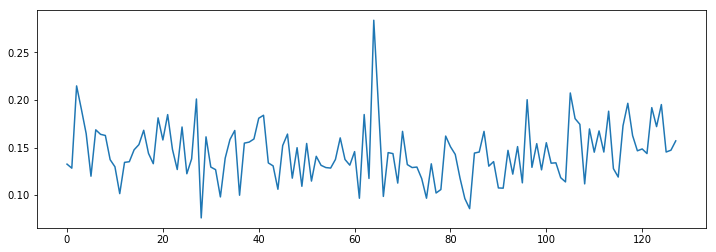

In [244]:
# ploting the first sample data for T1
DataPlot = Data_T1_torch.numpy()
plt.figure(figsize=(12,4))
plt.plot(np.arange(128), DataPlot[0][:])

In [245]:
# generating the labels for data
Y_T1_torch = 1* torch.ones(Data_T1_torch.shape[0],1)
Y_T2_torch = 2* torch.ones(Data_T2_torch.shape[0],1)
Y_T3_torch = 3* torch.ones(Data_T3_torch.shape[0],1)
Y_T4_torch = 4* torch.ones(Data_T4_torch.shape[0],1)

In [246]:
Y_T4_torch

tensor([[4.],
        [4.],
        [4.],
        ...,
        [4.],
        [4.],
        [4.]])

In [247]:
# preparing a batch 

def input_data(data, label, ws, train_set):
    
   # creat this batch
    L = data.shape[0]
    
    for i in range(L-ws):
        window = data[i:i+ws][:]
        #label = label[i+ws:i+ws+1]
        train_set.append((window, label))

    return train_set
    
    

In [248]:
# by considering batch creation
window_size = 200 # determining the temporal dynamics of ECoG 
# feed the data for creating the batches
# append all the targets
train_set = []    
Train_batch_1 = input_data(Data_T1_torch,Y_T1_torch[0][0], window_size, train_set)
Train_batch_2 = input_data(Data_T2_torch,Y_T2_torch[0][0], window_size, Train_batch_1)
Train_batch_3 = input_data(Data_T3_torch,Y_T3_torch[0][0], window_size, Train_batch_2)
Train_batch_4 = input_data(Data_T4_torch,Y_T4_torch[0][0], window_size, Train_batch_3)

In [249]:
train_set = Train_batch_4

In [306]:
len(train_set)

564022

In [252]:
train_set[200455]

(tensor([[0.1666, 0.1115, 0.1528,  ..., 0.1709, 0.1710, 0.1636],
         [0.1673, 0.1117, 0.1525,  ..., 0.1712, 0.1704, 0.1634],
         [0.1680, 0.1118, 0.1521,  ..., 0.1715, 0.1699, 0.1633],
         ...,
         [0.1034, 0.1652, 0.1877,  ..., 0.1405, 0.1005, 0.1235],
         [0.1031, 0.1651, 0.1880,  ..., 0.1402, 0.1003, 0.1232],
         [0.1027, 0.1650, 0.1882,  ..., 0.1400, 0.1001, 0.1230]],
        dtype=torch.float64),
 tensor(2.))

In [267]:
# creat the LSTM model

class LSTM(nn.Module):
    
    def __init__(self, input_size = 128, hidden_size = 10, out_size = 1):
        
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, out_size)
        
        # (H, C)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))
        
    def forward(self, seq):
        
        lstm_out , self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]
        
    
    

In [9]:
help(torch.nn.LSTM)

Help on class LSTM in module torch.nn.modules.rnn:

class LSTM(RNNBase)
 |  LSTM(*args, **kwargs)
 |  
 |  Applies a multi-layer long short-term memory (LSTM) RNN to an input
 |  sequence.
 |  
 |  
 |  For each element in the input sequence, each layer computes the following
 |  function:
 |  
 |  .. math::
 |      \begin{array}{ll} \\
 |          i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
 |          f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
 |          g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
 |          o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
 |          c_t = f_t * c_{(t-1)} + i_t * g_t \\
 |          h_t = o_t * \tanh(c_t) \\
 |      \end{array}
 |  
 |  where :math:`h_t` is the hidden state at time `t`, :math:`c_t` is the cell
 |  state at time `t`, :math:`x_t` is the input at time `t`, :math:`h_{(t-1)}`
 |  is the hidden state of the layer at time `t-1` or the initial hidden
 |  state a

In [86]:

# choose one of these criteria for next section

# for regression problems
#Mean Absolute Error
criterion = nn.L1Loss()

#Mean Square Error Loss
criterion = nn.MSELoss()

#Smooth L1 Loss
criterion = nn.SmoothL1Loss()


# for classification problems

#Negative Log-Likelihood Loss
criterion = nn.NLLLoss()

#Cross-Entropy Loss
criterion = CrossEntropyLoss()

# Kullback-Leibler divergence
criterion = nn.KLDivLoss()

#different optimizer:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)



In [308]:
# defining the methods of loss and optimizer
torch.manual_seed(42)
model = LSTM()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [309]:
model

LSTM(
  (lstm): LSTM(128, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [310]:
# check the number of parameters in layers
for p in model.parameters():
    print(p.numel())

5120
400
40
40
10
1


In [311]:
# train the LSTM model
epochs = 10
future = 40

model = model.to(torch.float)

All_y_pred = []
All_y_train = []

for i in [1]: #range(epochs):
    
    for seq, y_train in X_train_set:
        
        seq = seq.to(torch.float)
        y_train = y_train.to(torch.float)
                
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
         
        y_pred = model(seq)
        All_y_pred.append(y_pred.detach().numpy())
        All_y_train.append(y_train.numpy())
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = X_train_set[-window_size:]
    
'''     
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y)
'''       
   

Epoch 1 Loss: 9.094947017729282e-13


'     \n    for f in range(future):\n        \n        seq = torch.FloatTensor(preds[-window_size:])\n        \n        with torch.no_grad():\n            \n            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))\n            \n            preds.append(model(seq).item())\n            \n    loss = criterion(torch.tensor(preds[-window_size:]), y)\n'

In [278]:
 y_train

tensor(2.)

In [305]:
len(X_train_set)

101231

In [279]:
y_pred

tensor([2.0000], grad_fn=<SelectBackward>)

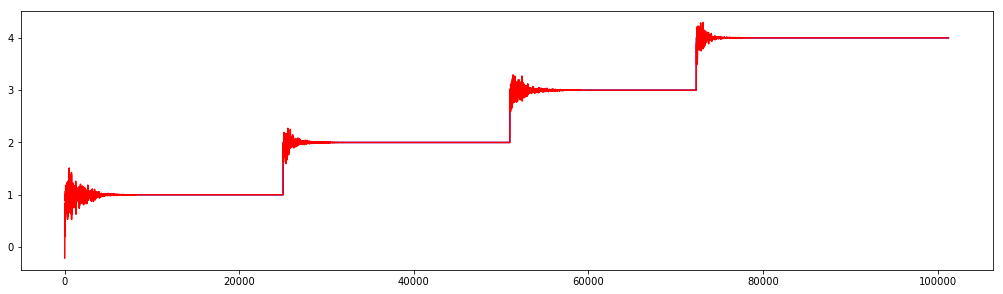

In [321]:
# plot the train and pred results
import matplotlib.pyplot as plt
%matplotlib inline
x_range = 101231
y_preds = []
y_trains = []

for i in range(x_range):
    y_preds.append(All_y_pred[i][0])
    y_trains.append(All_y_train[i].item())
    
    
t_bin = np.arange(0,x_range,1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.9,.9])
ax.plot(t_bin,y_trains,'b')
ax.plot(t_bin,y_preds,'r')
plt.savefig('Regression_4target.png',facecolor='w', transparent=False, dpi=300)

In [4]:
All_y_Val = []
for i in range(10):
    seq, y_train = X_train_set[0]
    seq = seq.to(torch.float)
    y_pred = model(seq)
    All_y_Val.append(y_pred.detach().numpy())


NameError: name 'X_train_set' is not defined

In [5]:
X_train_set

NameError: name 'X_train_set' is not defined

In [1]:
# plot the train and pred results
import matplotlib.pyplot as plt
%matplotlib inline
x_range = 40000
y_preds = []
y_trains = []

for i in range(x_range):
    y_preds.append(All_y_Val[i][0])
    y_trains.append(All_y_train[i].item())
    
    
t_bin = np.arange(0,x_range,1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.9,.9])
ax.plot(t_bin,y_trains,'b')
ax.plot(t_bin,y_preds,'r')


NameError: name 'All_y_Val' is not defined

In [292]:
All_y_pred[300][0]

1.2386603

In [176]:
Y_T1 = 1* np.ones((Trials_Raw_T1.shape[0],1))
Y_T2 = 2* np.ones((Trials_Raw_T2.shape[0],1))
Y_T3 = 3* np.ones((Trials_Raw_T3.shape[0],1))
Y_T4 = 4* np.ones((Trials_Raw_T4.shape[0],1))

In [182]:
y_trains = np.concatenate((Y_T1, Y_T2, Y_T3, Y_T4), axis=0)


In [183]:
y_trains.shape

(102031, 1)

tensor(4.)

In [205]:
w = All_y_train[0].item()
w

1.0

In [264]:
seq, y_train = train_set[0]
len(seq)

200

In [265]:

qw = seq.view(len(seq), 1, -1)

In [266]:
qw.shape

torch.Size([200, 1, 128])